In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Abrir, particionar y poner nombre a columnas del set de datos

In [16]:
data = pd.read_csv('HIGGS.csv.gz', nrows=2000000, compression='gzip', header=None, sep=',', quotechar='"')

new_column_names = ["signal",
                    "lepton pT",
                    "lepton eta", 
                    "lepton phi", 
                    "missing energy magnitude", 
                    "missing energy phi", 
                    "jet 1 pt", 
                    "jet 1 eta", 
                    "jet 1 phi", 
                    "jet 1 b-tag", 
                    "jet 2 pt", 
                    "jet 2 eta", 
                    "jet 2 phi", 
                    "jet 2 b-tag", 
                    "jet 3 pt", 
                    "jet 3 eta", 
                    "jet 3 phi", 
                    "jet 3 b-tag", 
                    "jet 4 pt", 
                    "jet 4 eta", 
                    "jet 4 phi", 
                    "jet 4 b-tag", 
                    "m_jj", 
                    "m_jjj", 
                    "m_lv", 
                    "m_jlv", 
                    "m_bb", 
                    "m_wbb", 
                    "m_wwbb"]
data.columns = new_column_names
print(data.columns)


In [17]:
# Guardad los 2 millones de datos en un nuevo archivo csv
data.to_csv('HIGGS_2M.csv', index=True)

# Revisar si los datos están completos

In [30]:
# Revisamos que no haya datos nulos en ninguna de las columnas
vacios = data.isnull().sum()

for i in range(len(vacios)):
    print("{}: {}".format(new_column_names[i], vacios[i]))

signal: 0
lepton pT: 0
lepton eta: 0
lepton phi: 0
missing energy magnitude: 0
missing energy phi: 0
jet 1 pt: 0
jet 1 eta: 0
jet 1 phi: 0
jet 1 b-tag: 0
jet 2 pt: 0
jet 2 eta: 0
jet 2 phi: 0
jet 2 b-tag: 0
jet 3 pt: 0
jet 3 eta: 0
jet 3 phi: 0
jet 3 b-tag: 0
jet 4 pt: 0
jet 4 eta: 0
jet 4 phi: 0
jet 4 b-tag: 0
m_jj: 0
m_jjj: 0
m_lv: 0
m_jlv: 0
m_bb: 0
m_wbb: 0
m_wwbb: 0


/var/folders/tq/3xjxdl0d4yg63z8ylzy2cs4m0000gn/T/ipykernel_96946/986726471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{}: {}".format(new_column_names[i], vacios[i]))


# Distribución de los datos

In [33]:
data.shape

(2000000, 29)

In [31]:
data.head(10)

,signal,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
5,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
6,1.0,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,...,0.069496,1.377130,3.101961,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786
7,1.0,0.933895,0.629130,0.527535,0.238033,-0.966569,0.547811,-0.059439,-1.706866,2.173076,...,1.291248,-1.467454,0.000000,0.901837,1.083671,0.979696,0.783300,0.849195,0.894356,0.774879
8,1.0,1.405144,0.536603,0.689554,1.179567,-0.110061,3.202405,-1.526960,-1.576033,0.000000,...,-0.151202,1.163489,0.000000,1.667071,4.039273,1.175828,1.045352,1.542972,3.534827,2.740754
9,1.0,1.176566,0.104161,1.397002,0.479721,0.265513,1.135563,1.534831,-0.253291,0.000000,...,0.268541,0.530334,0.000000,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364


In [37]:
caracteristicas ={}
for i in range(len(new_column_names)):
    caracteristicas[new_column_names[i]] = data[new_column_names[i]].describe()


In [39]:
for i in caracteristicas:
    print(caracteristicas[i])

count    2.000000e+06
mean     5.294090e-01
std      4.991345e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: signal, dtype: float64
count    2.000000e+06
mean     9.909598e-01
std      5.649717e-01
min      2.746966e-01
25%      5.902043e-01
50%      8.530054e-01
75%      1.235860e+00
max      9.112755e+00
Name: lepton pT, dtype: float64
count    2.000000e+06
mean     3.508929e-04
std      1.008749e+00
min     -2.434976e+00
25%     -7.373486e-01
50%     -5.415563e-05
75%      7.382142e-01
max      2.434868e+00
Name: lepton eta, dtype: float64
count    2.000000e+06
mean    -9.774250e-05
std      1.006160e+00
min     -1.742508e+00
25%     -8.719308e-01
50%      4.165800e-04
75%      8.704391e-01
max      1.743236e+00
Name: lepton phi, dtype: float64
count    2.000000e+06
mean     9.981952e-01
std      5.996122e-01
min      6.259872e-04
25%      5.765781e-01
50%      8.912961e-01
75%      1.292381e+00
max      1.1307

/var/folders/tq/3xjxdl0d4yg63z8ylzy2cs4m0000gn/T/ipykernel_96946/645126036.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[new_column_names[i]], color='g', bins=100, hist_kws={'alpha': 0.4})
/var/folders/tq/3xjxdl0d4yg63z8ylzy2cs4m0000gn/T/ipykernel_96946/645126036.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

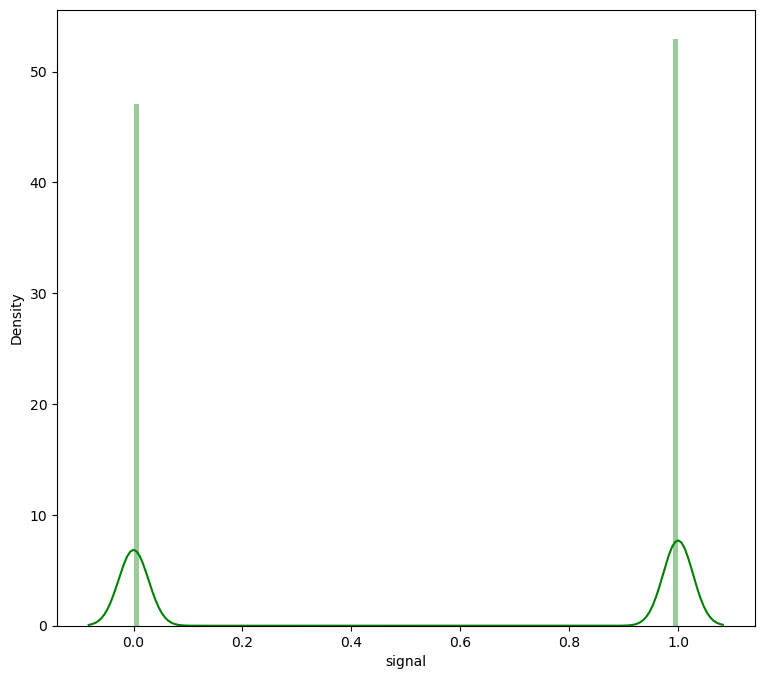

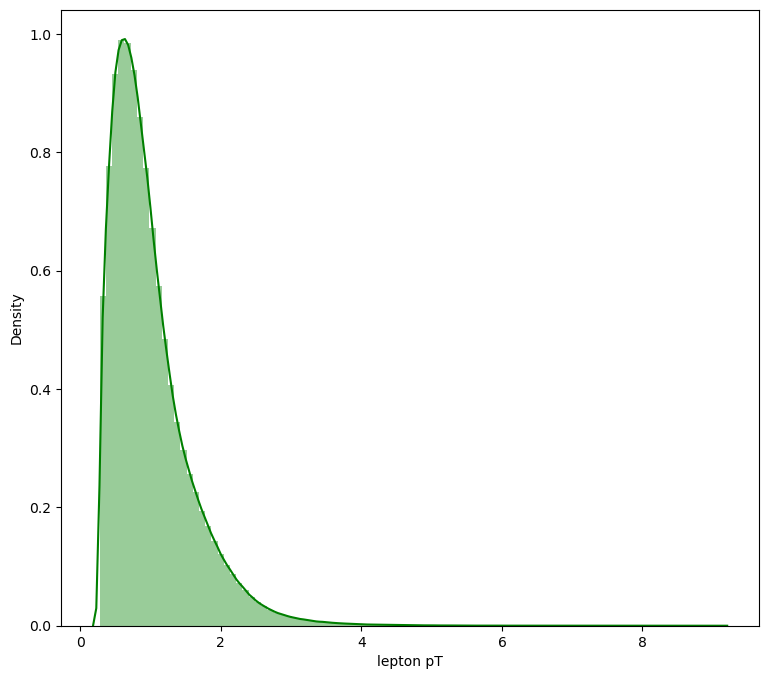

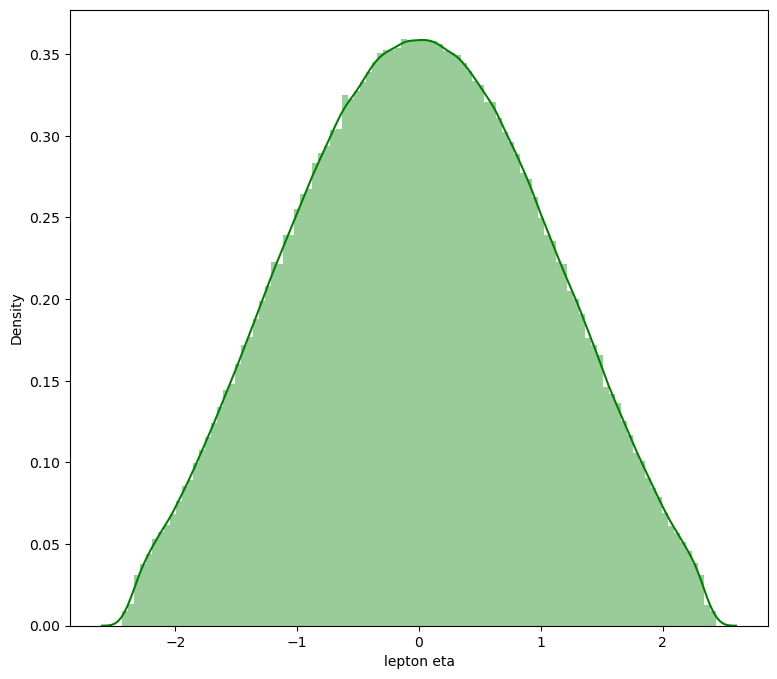

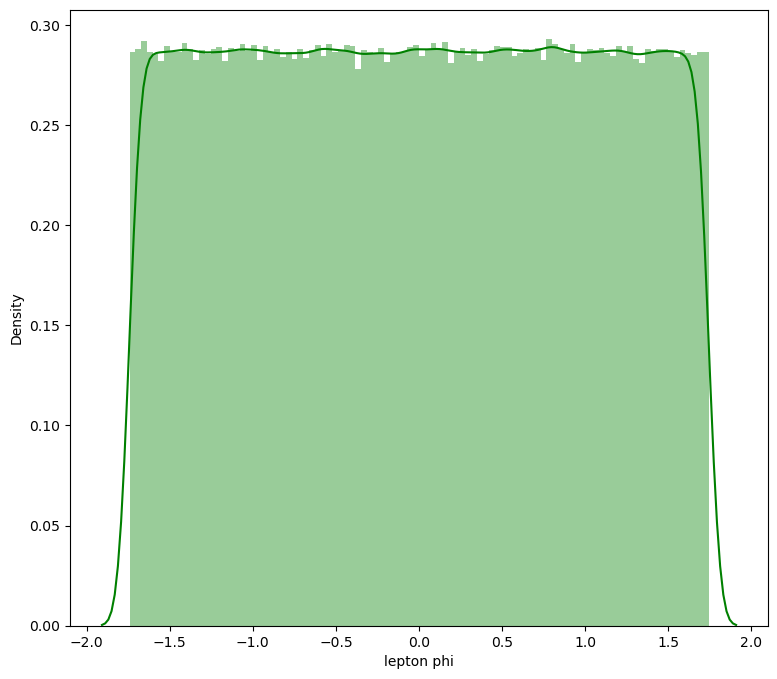

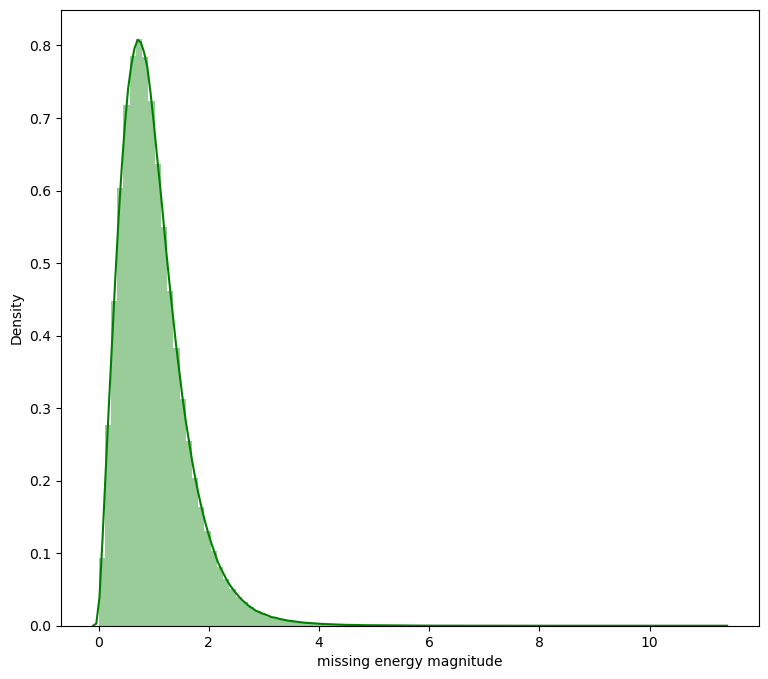

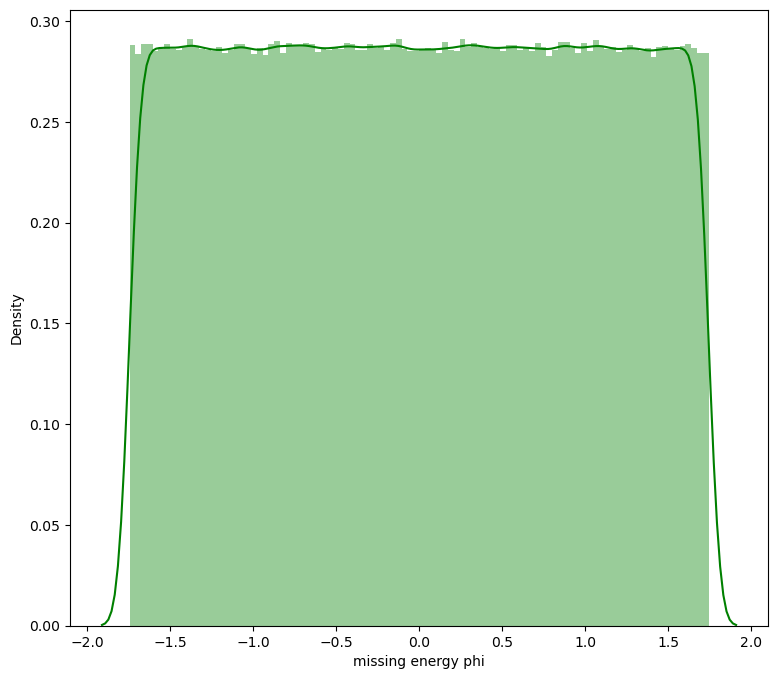

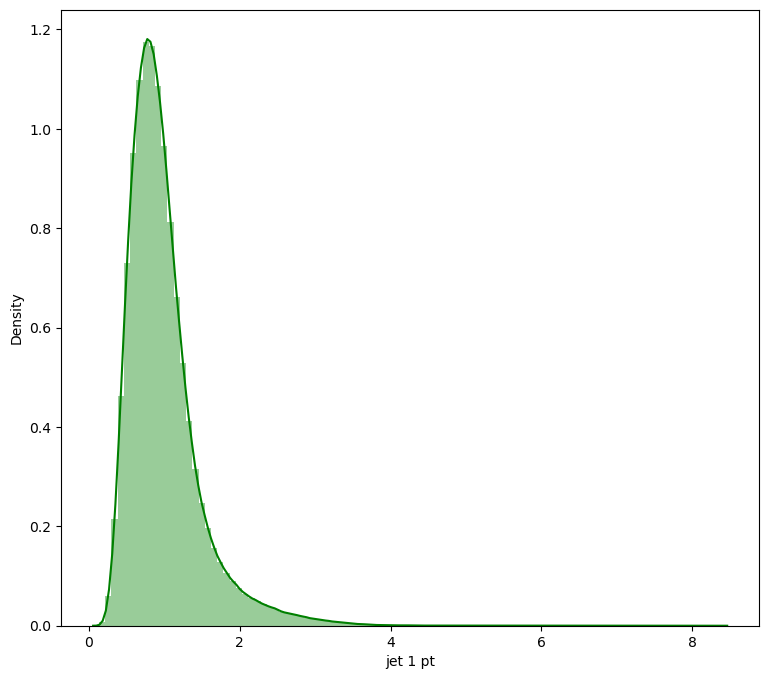

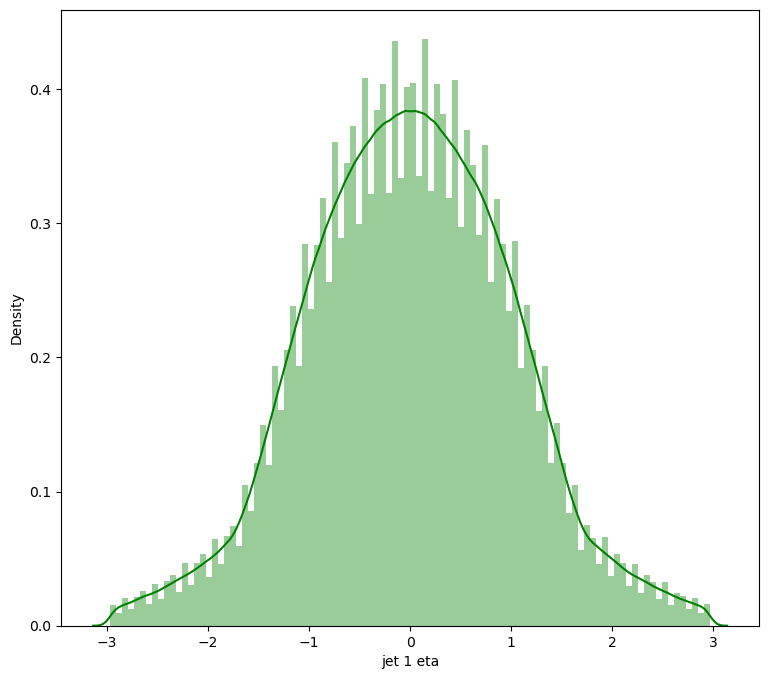

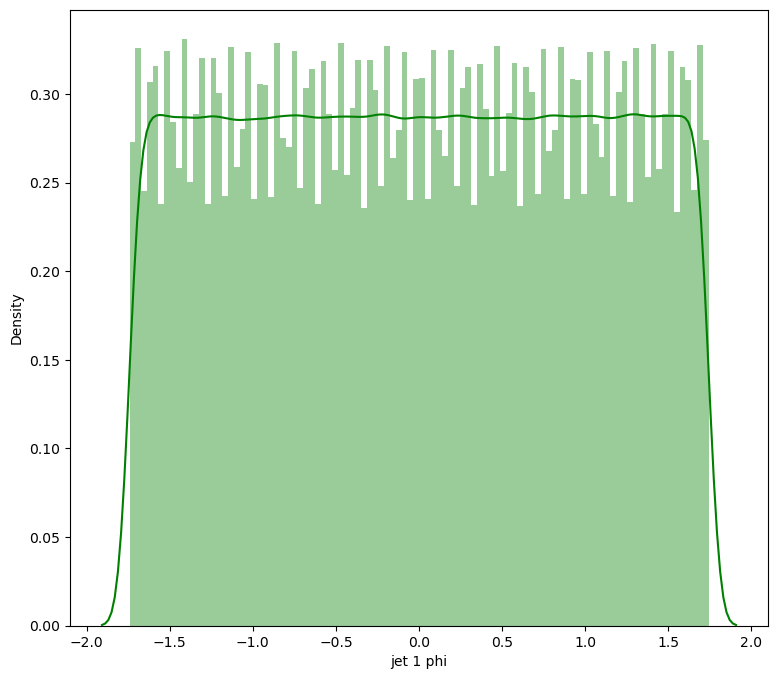

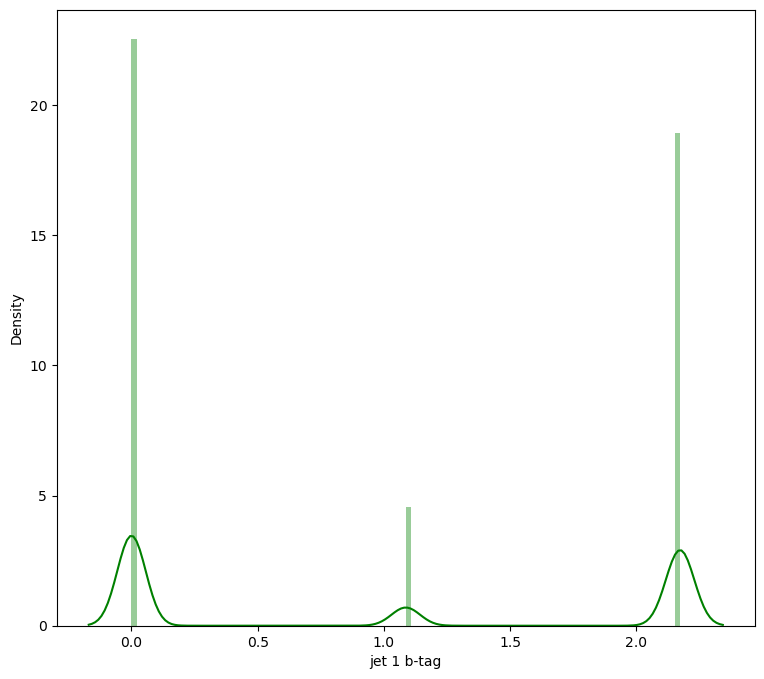

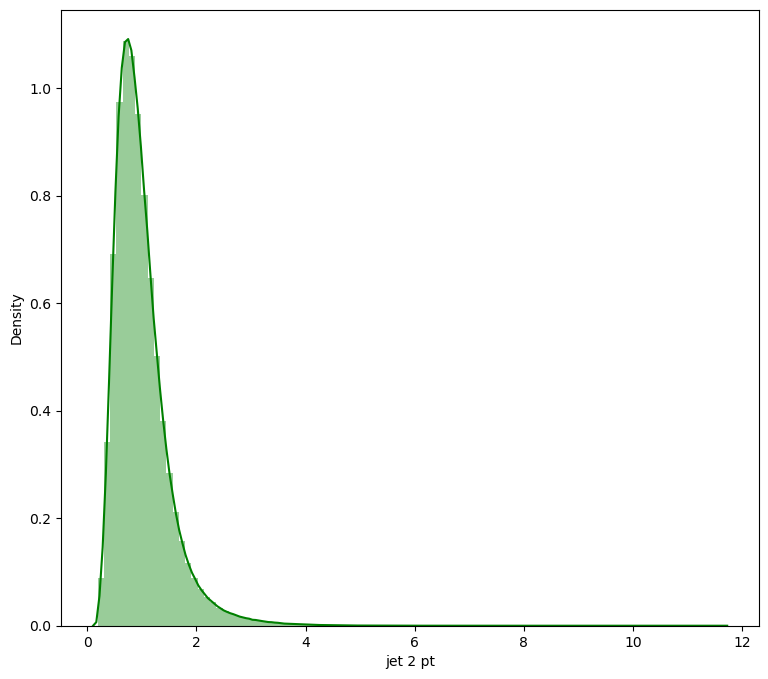

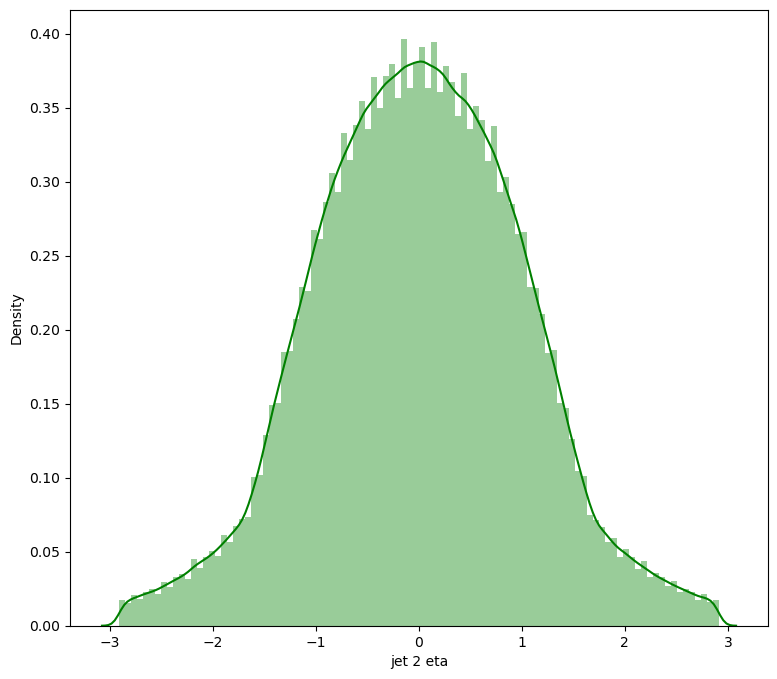

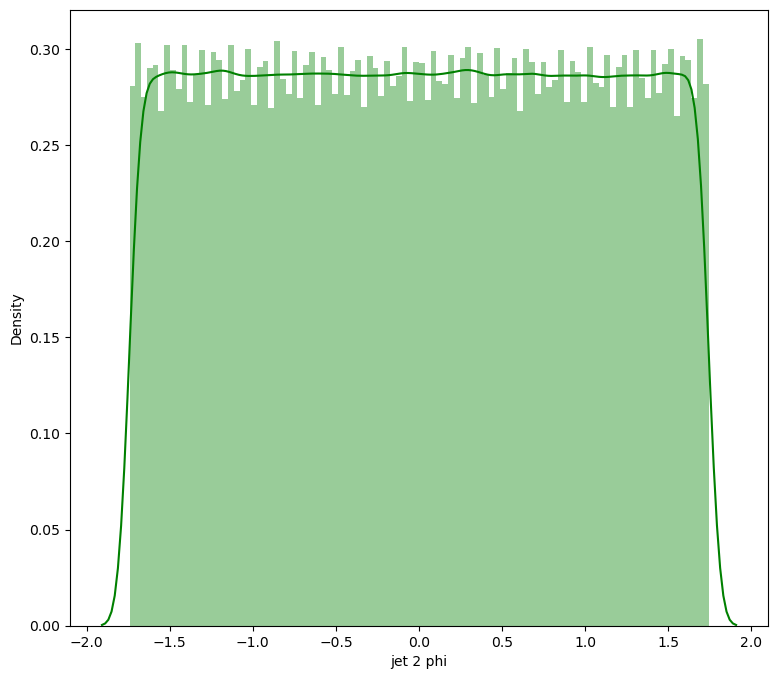

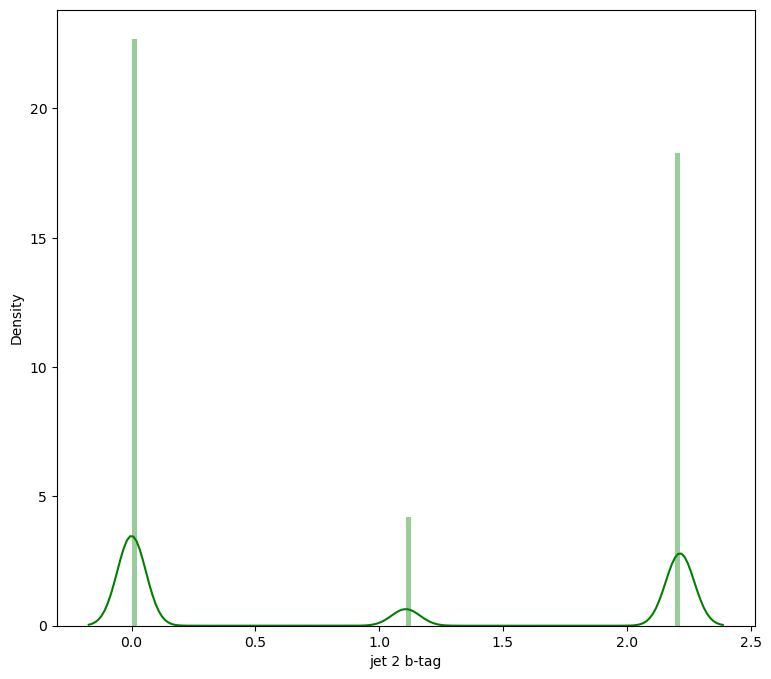

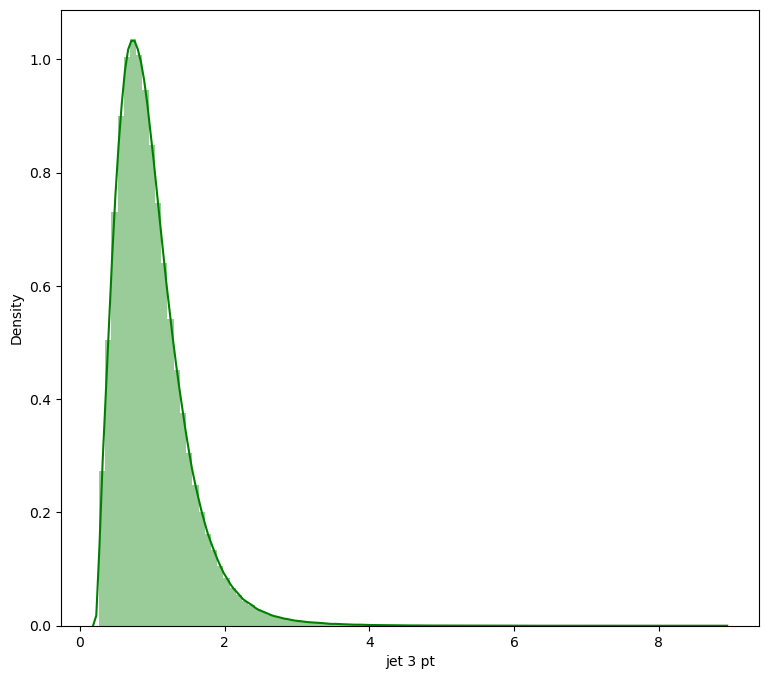

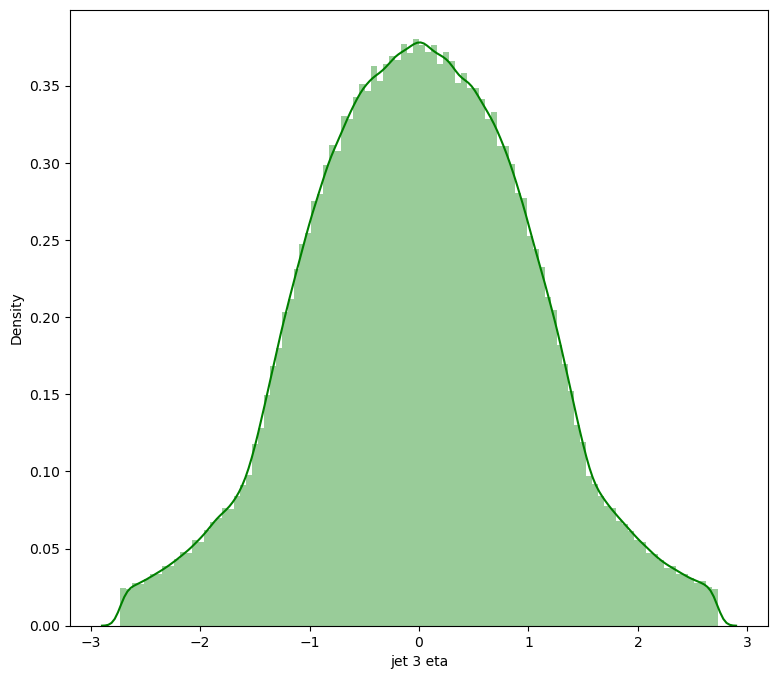

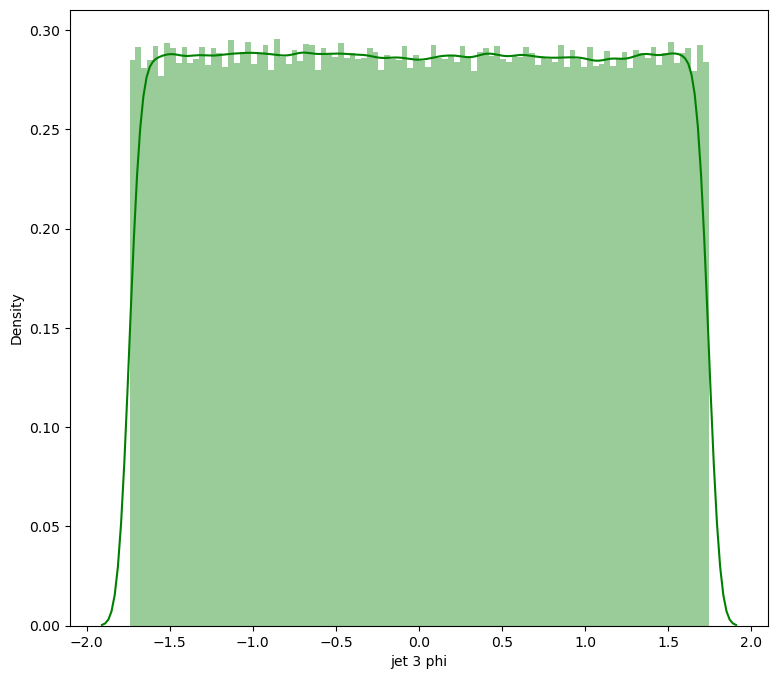

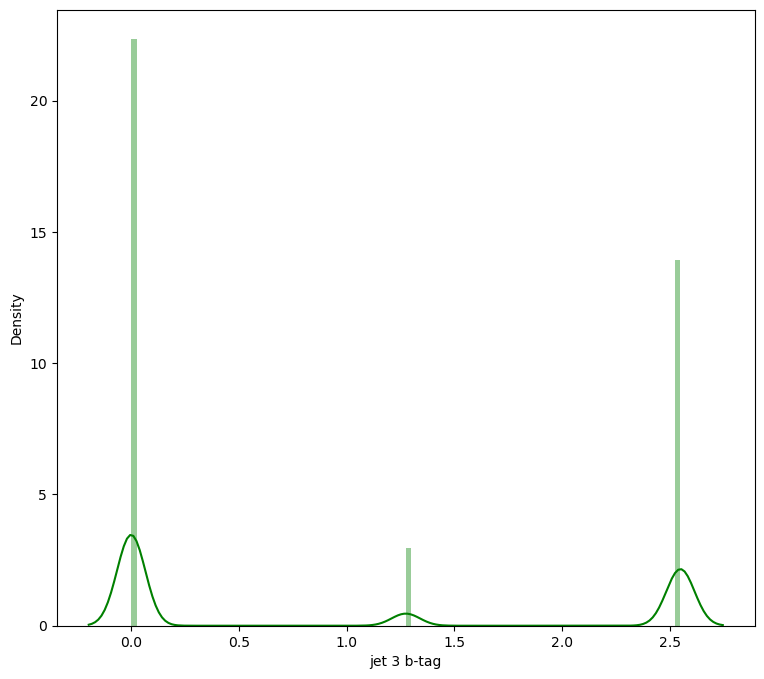

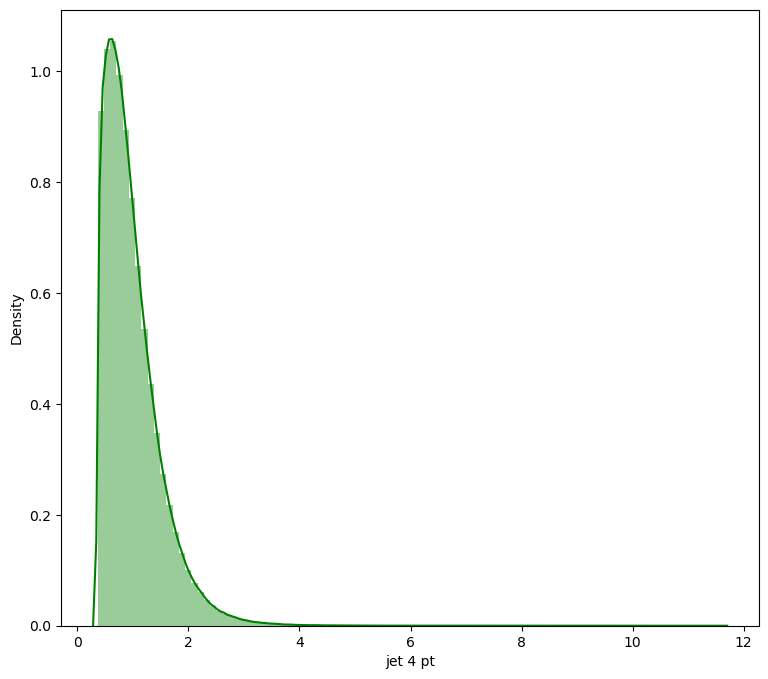

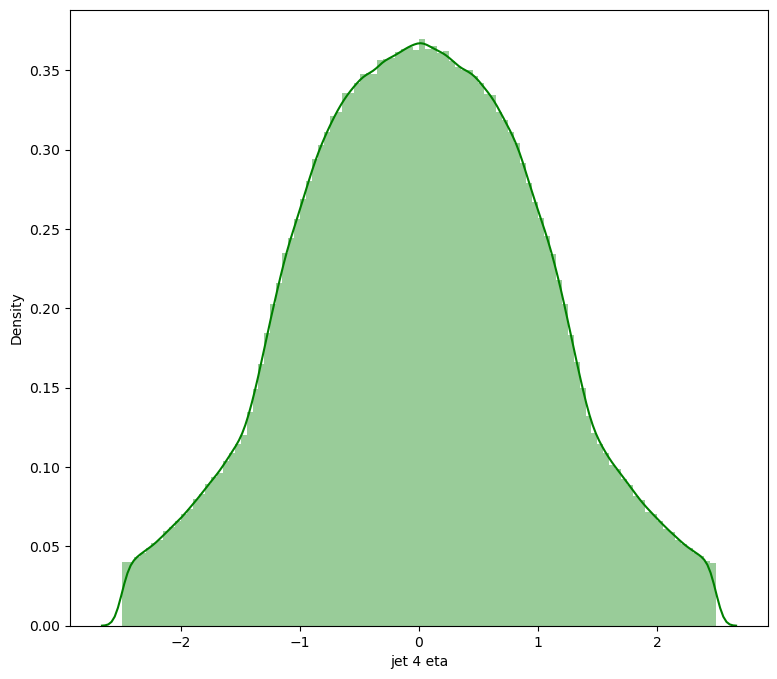

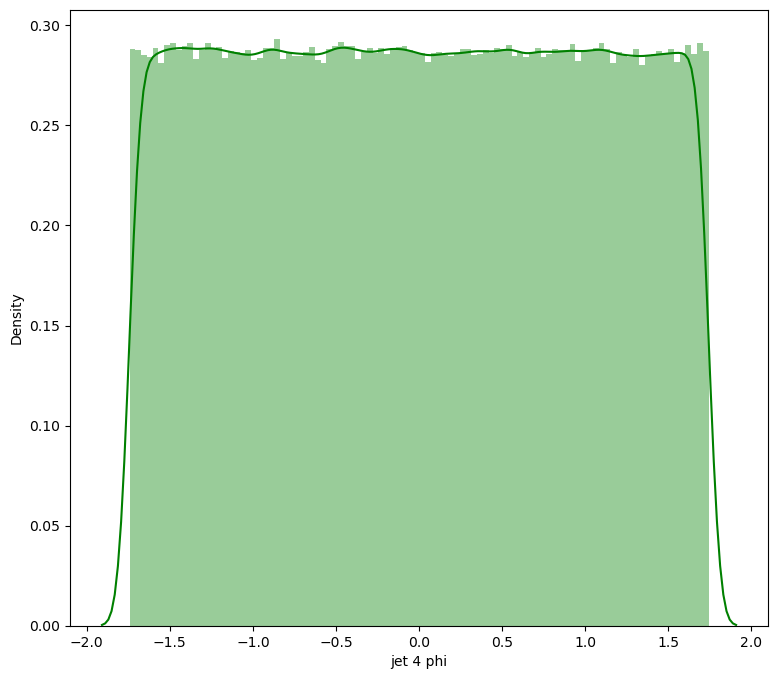

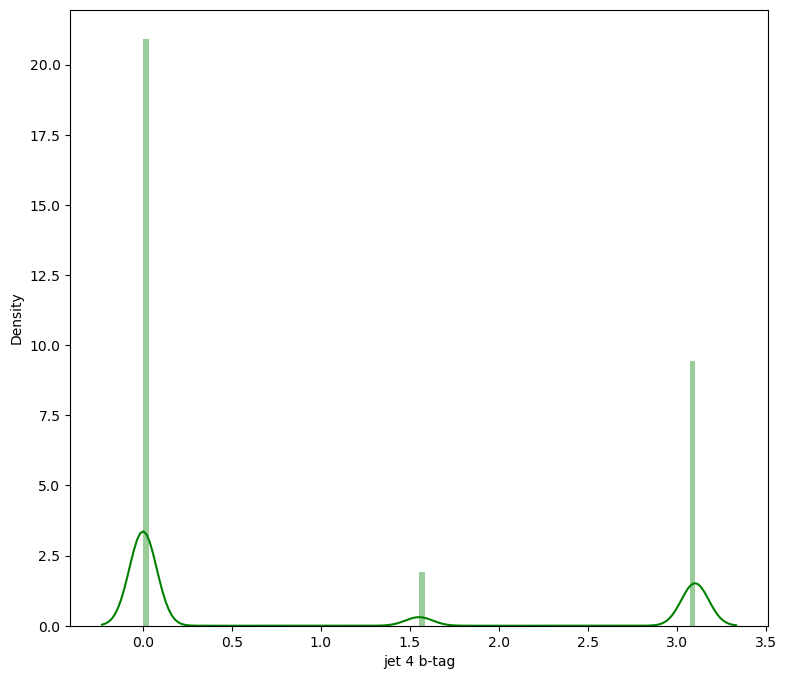

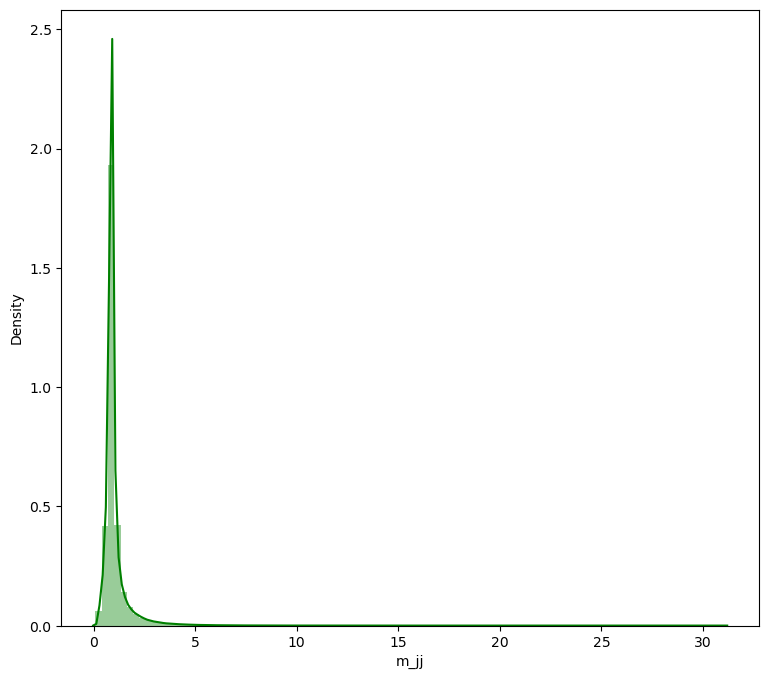

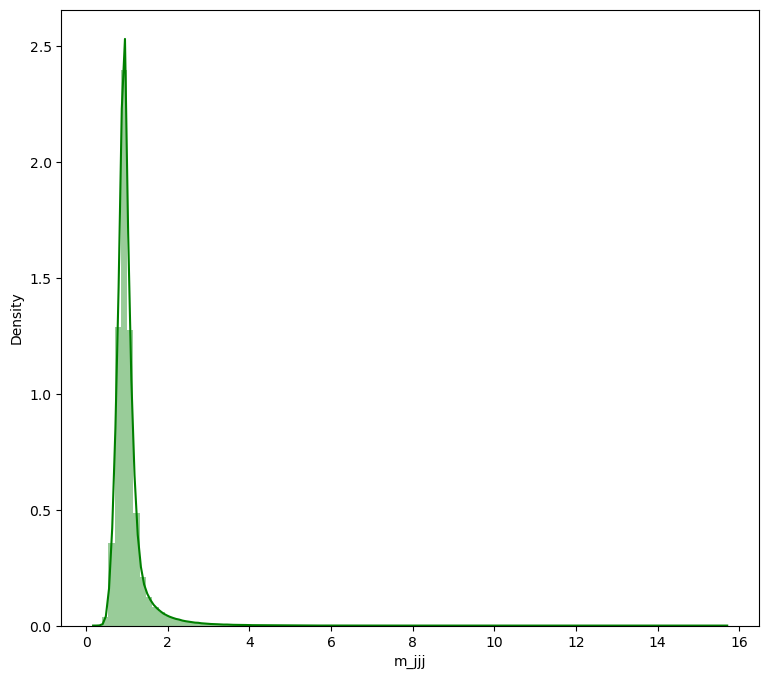

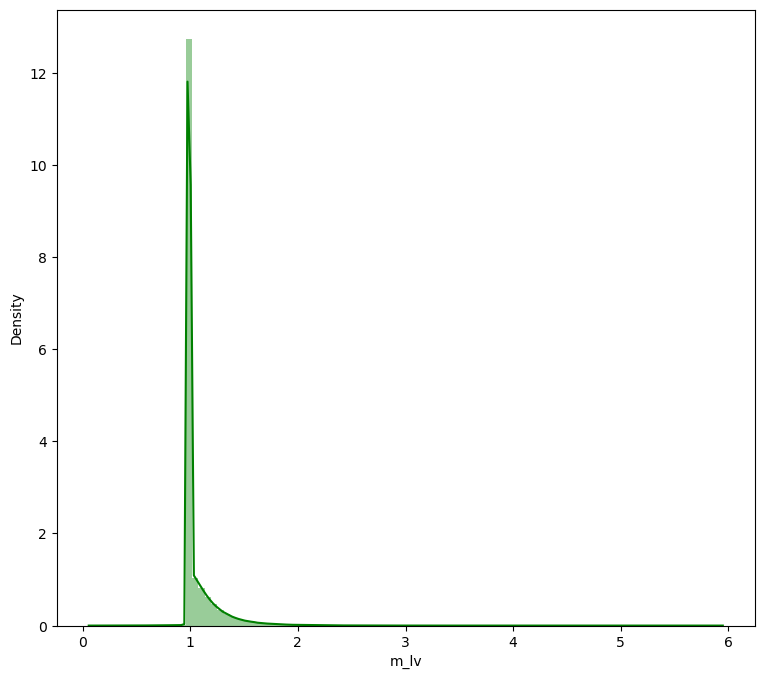

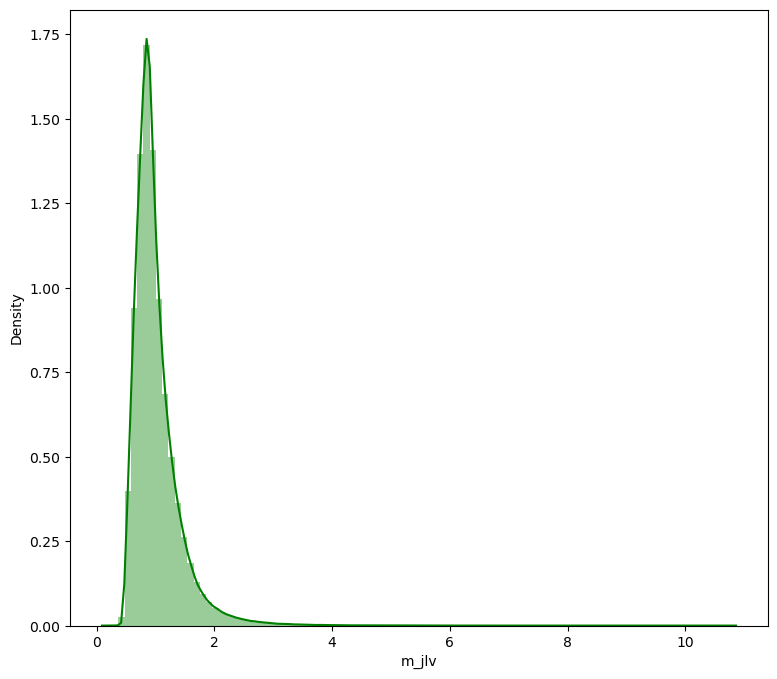

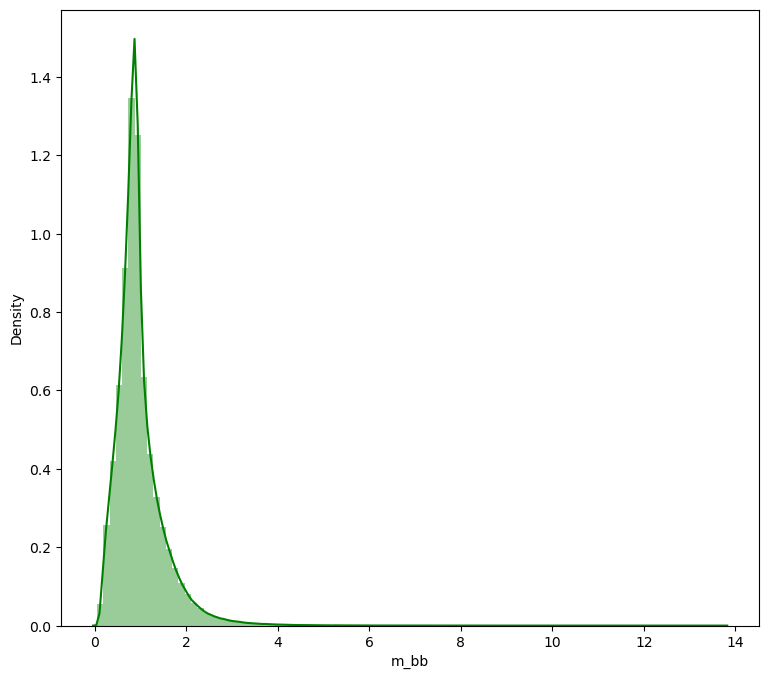

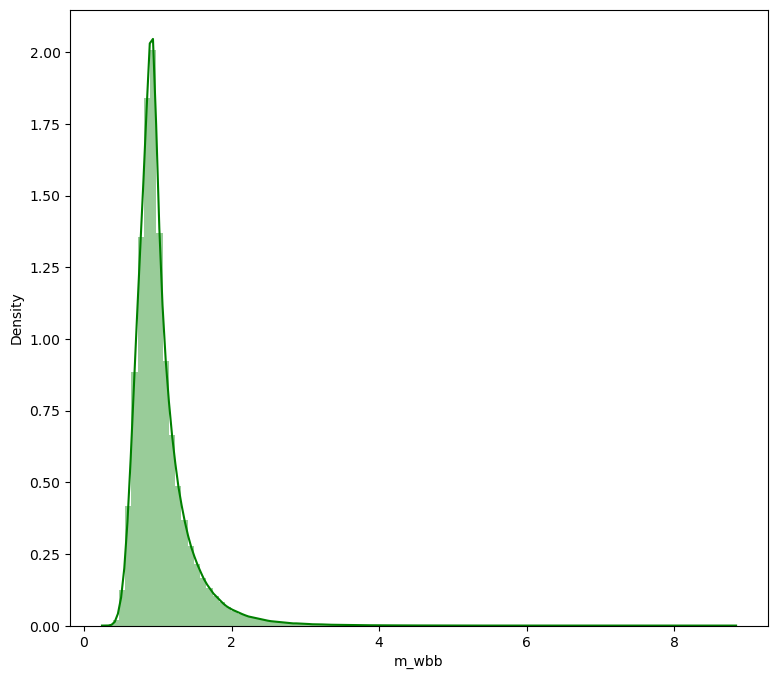

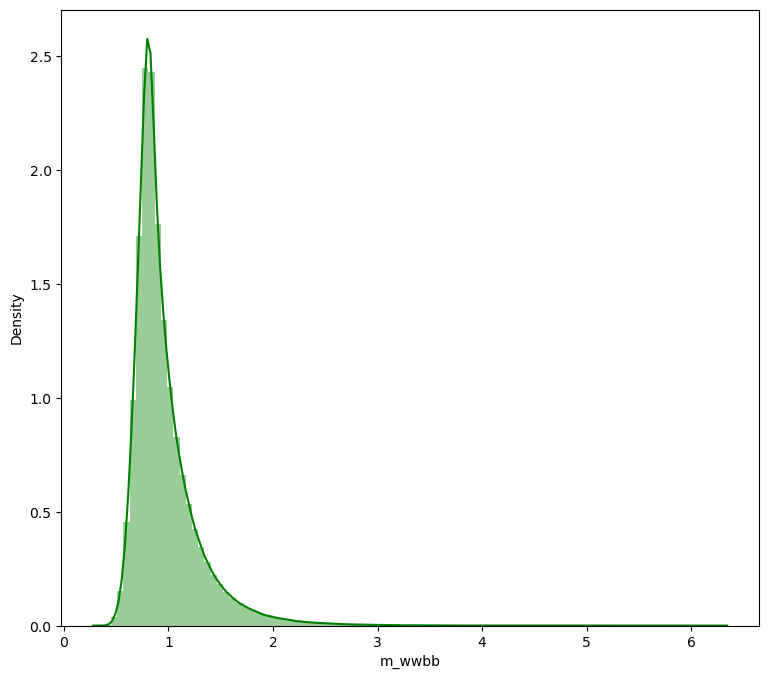

In [44]:
# Graficar las distribuciones de datos
for i in range(len(new_column_names)):
    plt.figure(figsize=(9, 8))
    sns.distplot(data[new_column_names[i]], color='g', bins=100, hist_kws={'alpha': 0.4})
    plt.savefig('Exploracion/{}.png'.format(new_column_names[i]))

array([[<Axes: title={'center': 'signal'}>,
        <Axes: title={'center': 'lepton pT'}>,
        <Axes: title={'center': 'lepton eta'}>,
        <Axes: title={'center': 'lepton phi'}>,
        <Axes: title={'center': 'missing energy magnitude'}>],
       [<Axes: title={'center': 'missing energy phi'}>,
        <Axes: title={'center': 'jet 1 pt'}>,
        <Axes: title={'center': 'jet 1 eta'}>,
        <Axes: title={'center': 'jet 1 phi'}>,
        <Axes: title={'center': 'jet 1 b-tag'}>],
       [<Axes: title={'center': 'jet 2 pt'}>,
        <Axes: title={'center': 'jet 2 eta'}>,
        <Axes: title={'center': 'jet 2 phi'}>,
        <Axes: title={'center': 'jet 2 b-tag'}>,
        <Axes: title={'center': 'jet 3 pt'}>],
       [<Axes: title={'center': 'jet 3 eta'}>,
        <Axes: title={'center': 'jet 3 phi'}>,
        <Axes: title={'center': 'jet 3 b-tag'}>,
        <Axes: title={'center': 'jet 4 pt'}>,
        <Axes: title={'center': 'jet 4 eta'}>],
       [<Axes: title={'center':

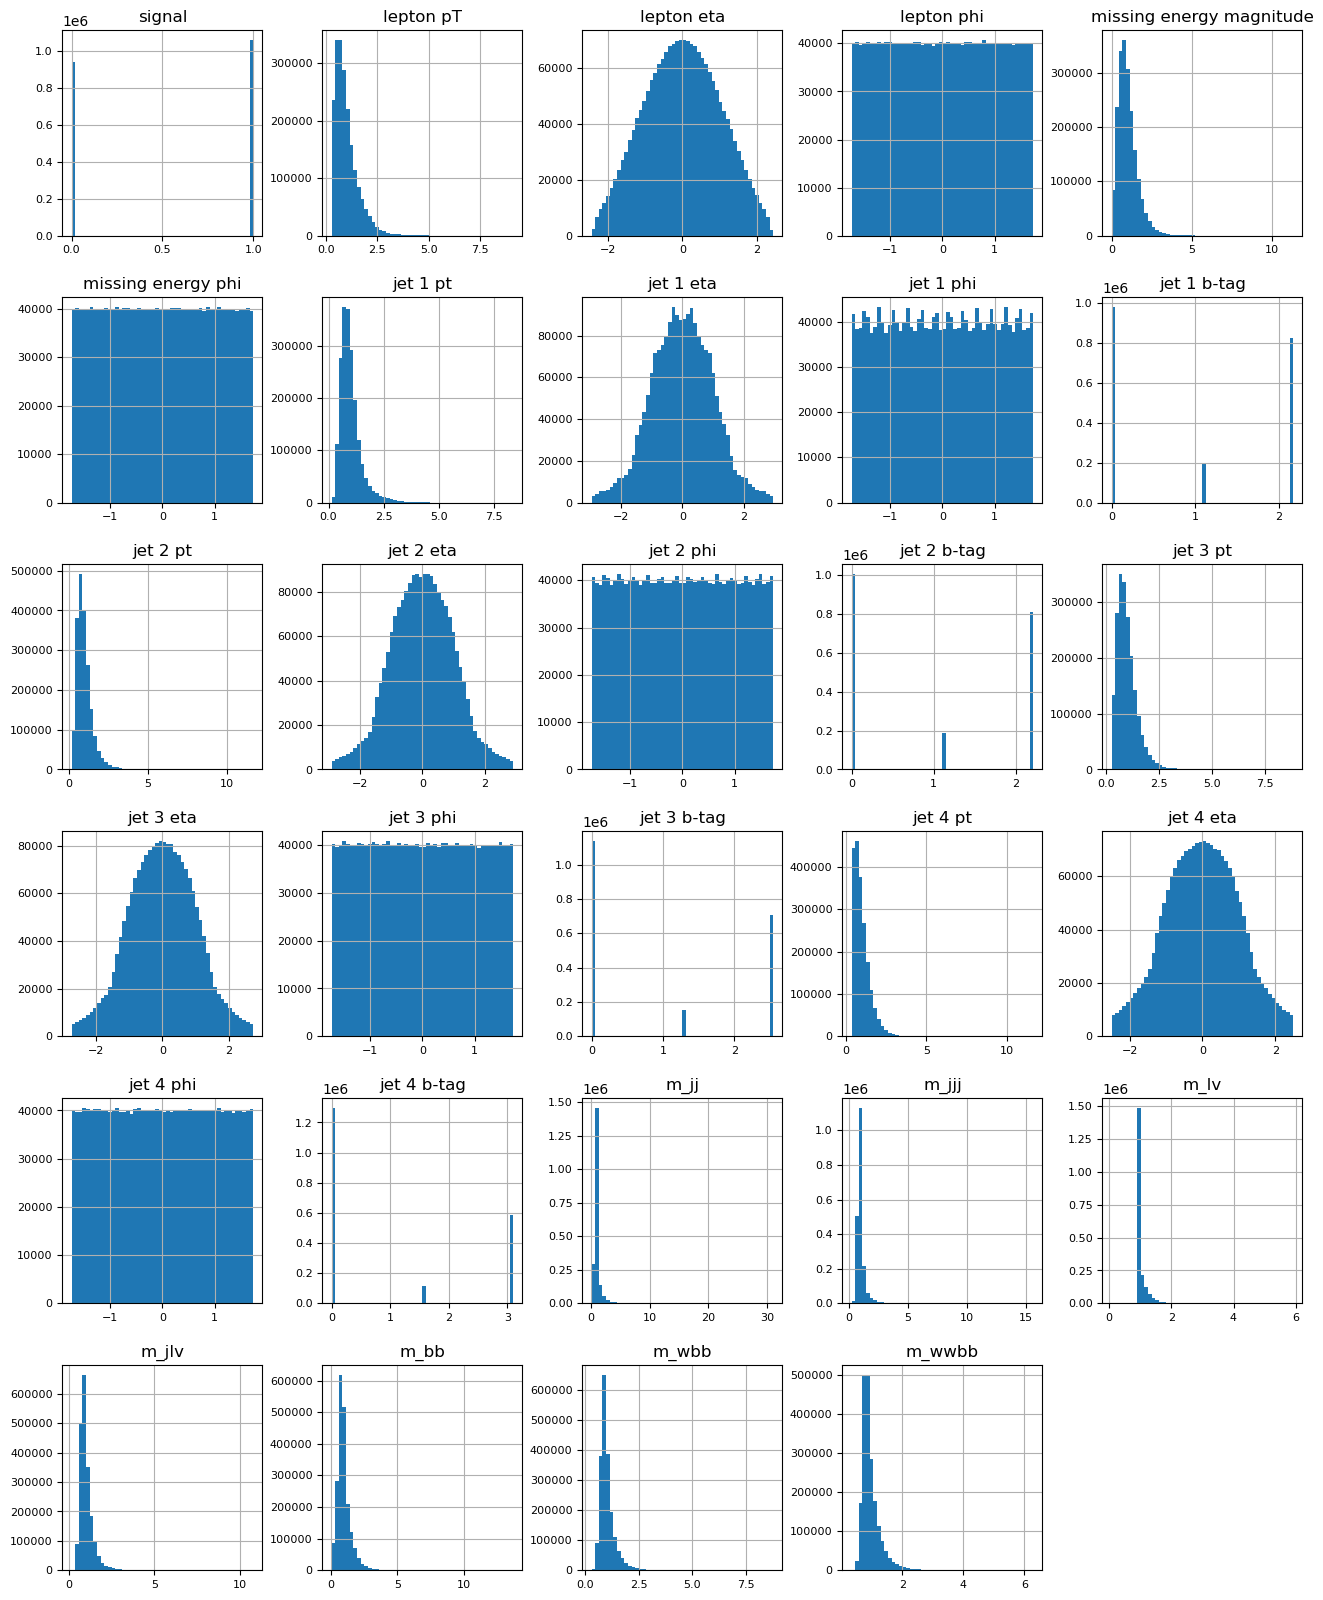

In [47]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Correlaciones

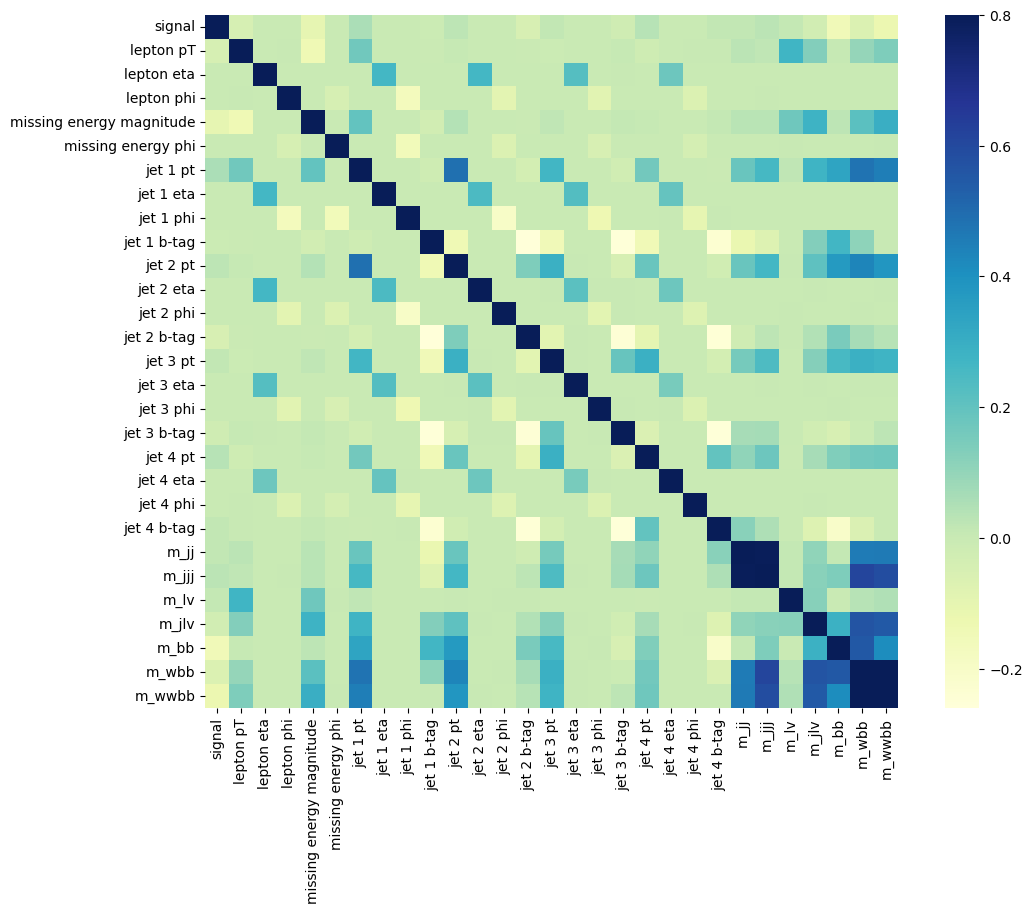

In [48]:
# Correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
plt.savefig('Exploracion/Correlacion.png')